In [7]:
from data_info import data_info
from matplotlib import pyplot as plt
import os
%matplotlib inline
import cv2
import json
from natsort import natsorted

In [2]:
data = data_info["chruch_street"]

In [3]:
data

{'data_path': '/root/data/data-chruch_street',
 'img_path': '/root/data/data-chruch_street/images',
 'json_annotation': '/root/data/data-chruch_street/annotations.json',
 'name': 'chruch_street.mp4',
 'testing': {'end_frame': None,
  'frame_stride': 30,
  'sets': [1],
  'start_frame': None,
  'videos': [0]},
 'training': {'end_frame': None,
  'frame_stride': 1,
  'sets': [0],
  'start_frame': None,
  'videos': [0]}}

In [10]:
def summarize_test_data(data):
    test_data = data["testing"]
    report = {}
    #report["img_count"] = 0
    
    
    report['bbox_count'] = 0
    
    annotations = json.load(open(data['json_annotation']))
    for set_num in test_data["sets"]:
        test_img_path = ""
        for boxes in annotations[str(set_num)].values():
            for frame in boxes:

                box = boxes[frame]
                if box['outside'] or box['occluded']:
                    continue
                elif int(frame) %test_data["frame_stride"] == test_data["frame_stride"]-1:
                    report['bbox_count'] += 1
                
    
    
    return report

In [79]:
def summarize_test_data(data):
    test_data = data["testing"]
    report = {}
    report["img_count"] = (test_data["end_frame"] - test_data["start_frame"])  / test_data["frame_stride"]
    
    report['bbox_count'] = 0
    
    annotations = json.load(open(data['json_annotation']))
    for frame in annotations:
        for box in annotations[frame].values():
            if box['outside'] or box['occluded']:
                continue
            elif box['height'] < 50:
                print( box['height'], frame)
            
    
    
    return report
    


In [11]:
summarize_test_data(data)

{'bbox_count': 655}

In [108]:
annotations = json.load(open(data['json_annotation']))

In [109]:
annotations

{u'0': {u'26301': {u'131': {u'attributes': [],
    u'height': 199,
    u'label': u'person',
    u'occluded': 0,
    u'outside': 1,
    u'width': 59,
    u'x1': 92,
    u'y1': 201},
   u'132': {u'attributes': [],
    u'height': 59,
    u'label': u'person',
    u'occluded': 0,
    u'outside': 1,
    u'width': 26,
    u'x1': 439,
    u'y1': 3}},
  u'13357': {u'68': {u'attributes': [],
    u'height': 92,
    u'label': u'person',
    u'occluded': 0,
    u'outside': 1,
    u'width': 37,
    u'x1': 291,
    u'y1': 105},
   u'69': {u'attributes': [],
    u'height': 155,
    u'label': u'person',
    u'occluded': 1,
    u'outside': 1,
    u'width': 58,
    u'x1': 661,
    u'y1': 249},
   u'70': {u'attributes': [],
    u'height': 167,
    u'label': u'person',
    u'occluded': 1,
    u'outside': 1,
    u'width': 40,
    u'x1': 678,
    u'y1': 205},
   u'71': {u'attributes': [],
    u'height': 65,
    u'label': u'person',
    u'occluded': 0,
    u'outside': 1,
    u'width': 30,
    u'x1': 577,
    

In [23]:
summarize_test_data(data)

{'bbox_count': 1008, 'img_count': 1900}

In [129]:
def parse_gt(set_num, frame_num):
    gt_file = "set0{}_V000_I{}.jpg.txt".format(set_num, frame_num)
    gt_path = os.path.join(data['data_path'], "annotations", "set0"+str(set_num), "V000", gt_file)
    
    bboxes = []
    
    
    f = open(gt_path, 'r')
    for line in f:
        if line[0] == '%':
            continue
        print(line)
        label, x0, y0, width, height,occ, x0v,y0v, widthv, heightv, ign, ang =line.strip().split(" ")
        if int(ign) != 1:
            bbox = [x0, y0, width, height, label]
            bboxes.append(bbox)
        
    return bboxes


def get_img_path(set_num,frame_num):
    image_name = "set0{}_V000_{}.jpg".format(set_num, frame_num)
    img_path = os.path.join(data['data_path'], "images", image_name)
    print(img_path)
    return img_path




def visualize_image(set_num, frame_num, source="txt"):
    img_path = get_img_path(set_num, frame_num)
    im = cv2.imread(img_path)[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    
    if source == "txt":  
        bboxes = parse_gt(set_num, frame_num)
    elif source == "json":
        bboxes = annotations[str(set_num)].get(str(frame_num), {}).values()
    print(bboxes)
    for bbox in bboxes:
       
        if source == "txt":

            
            x1 = int(bbox[0])
            y1 = int(bbox[1]) 
            width = int(bbox[2]) 
            height =  int(bbox[3])
            label = bbox[4]
        elif source == "json":
            if bbox['occluded'] ==1 or bbox['outside']==1:
                continue
            x1 = bbox['x1']
            y1 = bbox['y1']
            width = bbox['width']
            height =  bbox['height']
            label = bbox['label']
            
            
        rectangle = plt.Rectangle((x1,y1), width, height, fill=False, edgecolor="green", linewidth=3.5)
        ax.add_patch(rectangle)
        ax.text(x1, y1 - 2, "{}".format(label),
                bbox=dict(facecolor="green", alpha=0.5),
                fontsize=14, color='white')




    ax.set_title(frame_num)  
    plt.axis('off')
    plt.tight_layout()
    plt.plot()

    

    
            

/root/data/data-chruch_street/images/set01_V000_2950.jpg
person 255 52 31 84 0 0 0 0 0 0 0

ignore 213 62 22 57 1 0 0 0 0 1 0

ignore 233 58 21 58 0 0 0 0 0 1 0



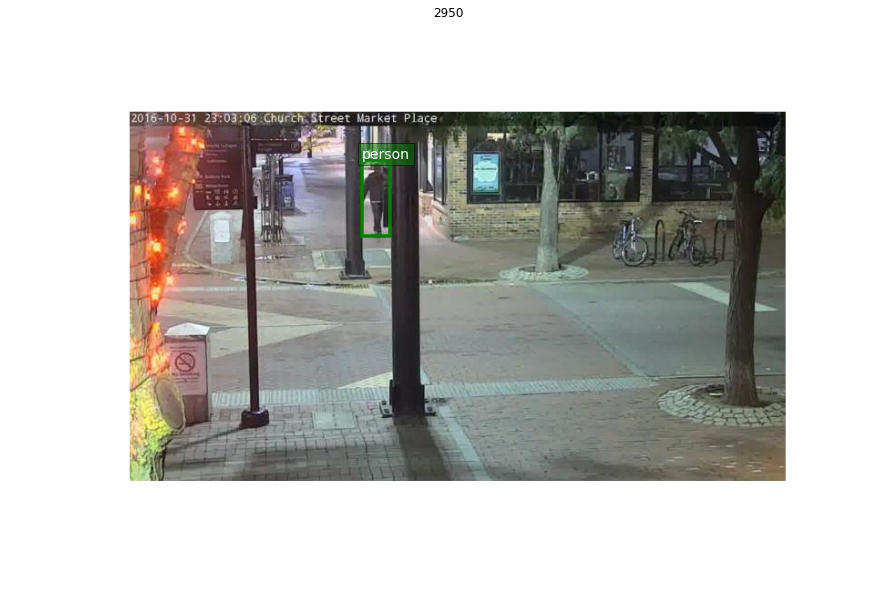

In [124]:

visualize_image(1,2950)

In [115]:
annotations["1"]["2950"]

{u'163': {u'attributes': [],
  u'height': 84,
  u'label': u'person',
  u'occluded': 0,
  u'outside': 0,
  u'width': 31,
  u'x1': 255,
  u'y1': 52},
 u'164': {u'attributes': [],
  u'height': 57,
  u'label': u'person',
  u'occluded': 1,
  u'outside': 1,
  u'width': 22,
  u'x1': 213,
  u'y1': 62},
 u'165': {u'attributes': [],
  u'height': 58,
  u'label': u'person',
  u'occluded': 0,
  u'outside': 1,
  u'width': 21,
  u'x1': 233,
  u'y1': 58}}

/root/data/data-chruch_street/images/set01_V000_2950.jpg
[{u'x1': 213, u'occluded': 1, u'height': 57, u'width': 22, u'outside': 1, u'y1': 62, u'attributes': [], u'label': u'person'}, {u'x1': 233, u'occluded': 0, u'height': 58, u'width': 21, u'outside': 1, u'y1': 58, u'attributes': [], u'label': u'person'}, {u'x1': 255, u'occluded': 0, u'height': 84, u'width': 31, u'outside': 0, u'y1': 52, u'attributes': [], u'label': u'person'}]


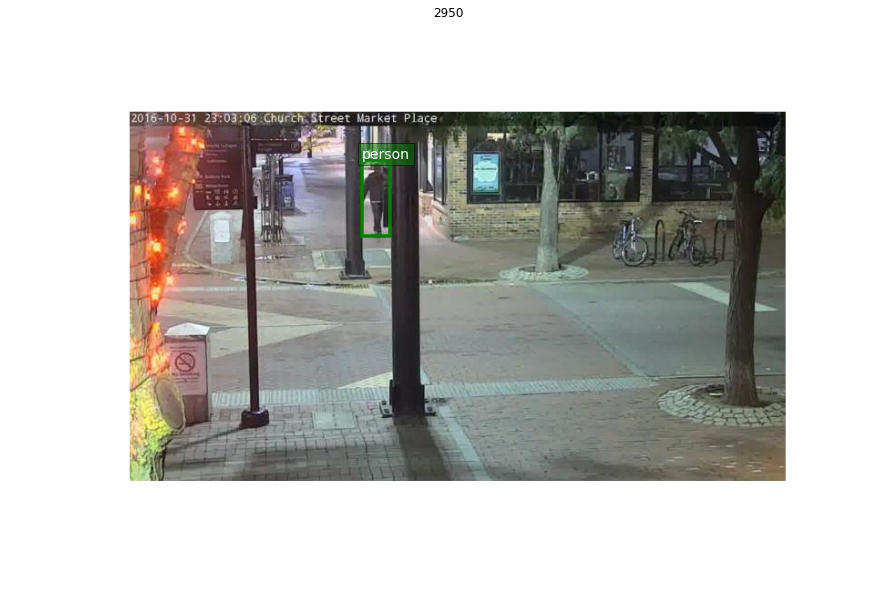

In [130]:
visualize_image(1,2950, "json")

/root/data/data-chruch_street/images/set00_V000_426.jpg
person 348 66 33 85 1 0 0 0 0 0 0

person 379 65 28 89 1 0 0 0 0 0 0

person 405 69 32 83 1 0 0 0 0 0 0

person 443 70 38 74 1 0 0 0 0 0 0



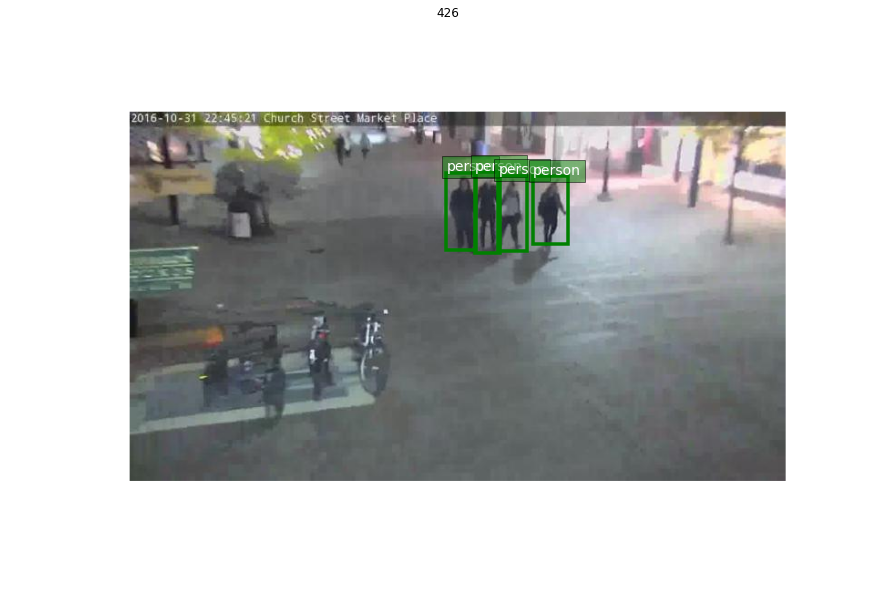

In [129]:
visualize_image(426)

/root/data/data-chruch_street/images/set00_V000_41999.jpg
person 669 233 49 171 0 0 0 0 0 1 0

person 685 182 33 156 0 0 0 0 0 1 0

person 342 25 15 80 0 0 0 0 0 1 0

person 354 23 25 71 0 0 0 0 0 1 0



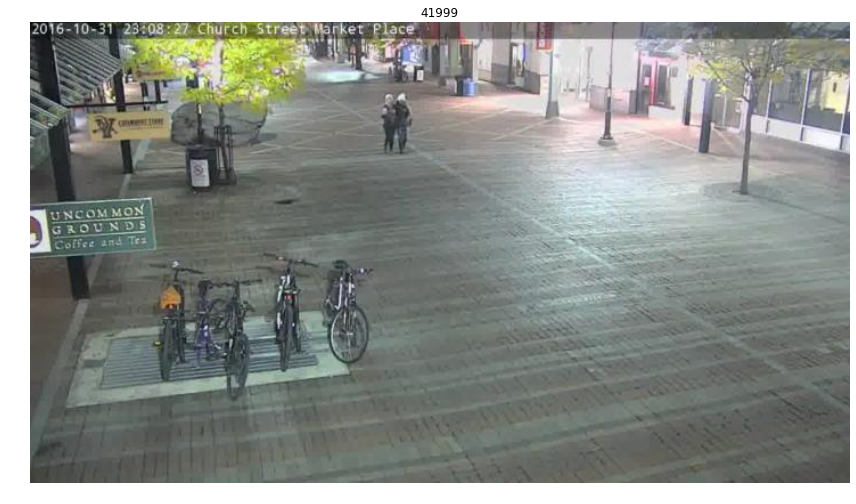

In [62]:
visualize_image(41999)

In [141]:
P = period = 300
S = start = 101
D = duration = 30

skipped = lambda f: (f>=S) and ((f-S)%P)<=duration

In [151]:
def checker_function(f, skipped):
    return skipped(f)

In [153]:
checker_function(181, skipped)

False